In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df_train= pd.read_excel('Final_Train.xlsx')
df_test= pd.read_excel('Final_Test.xlsx')

In [33]:
df_train.head(30)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100,train
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,train
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,train
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100,train
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100,train


In [4]:
print(df_train.info()), print(df_test.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.2+ KB
None


(None, None)

In [5]:
df_train['source'] = 'train'

df_test['source'] = 'test'

In [6]:
df =pd.concat([df_train, df_test],ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 8 columns):
Experience            7948 non-null object
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
source                7948 non-null object
dtypes: float64(1), object(7)
memory usage: 496.8+ KB


In [8]:
df.head(10)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train
5,8 years experience,100.0,NaN,"Porur, Chennai",Ayurveda,BAMS,NaN,train
6,42 years experience,200.0,NaN,"Karol Bagh, Delhi",Homeopath,BHMS,NaN,train
7,10 years experience,200.0,Dental Fillings Crowns and Bridges Fixing Impa...,"Arekere, Bangalore",Dentist,BDS,99%,train
8,14 years experience,100.0,NaN,"Old City, Hyderabad",General Medicine,"MBBS, MD - General Medicine",NaN,train
9,23 years experience,100.0,NaN,"Athani, Ernakulam",Dentist,"BSc, BDS",NaN,train


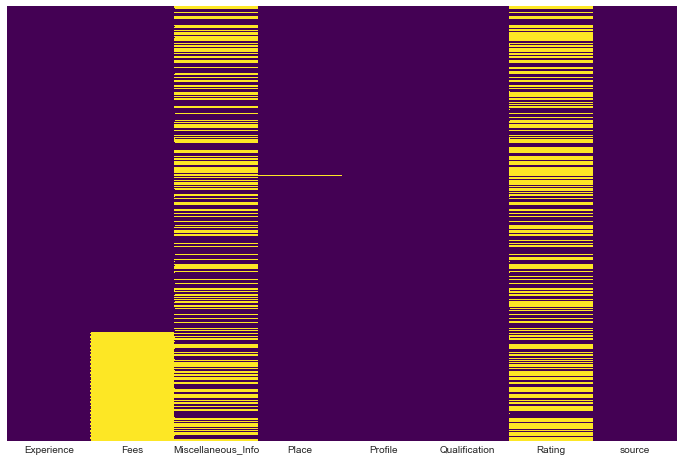

In [12]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(),cmap = 'viridis',yticklabels=False, cbar= False)

In [13]:
df = df.drop(['Miscellaneous_Info','Rating'],axis = 1)

Fees column

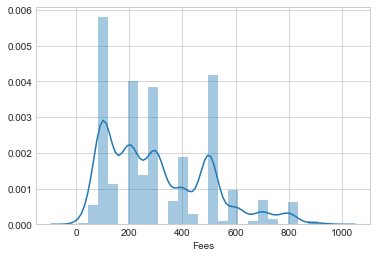

In [14]:
sns.distplot(df['Fees'].dropna())

Experience column

In [15]:
df['Experience'] = df['Experience'].astype(str)

In [16]:
df['Experience'] = df['Experience'].apply(lambda x: x.replace(' years experience','').strip())

In [17]:
df['Experience'] = df['Experience'].astype(int)

Place column

In [18]:
df['Place'] = df['Place'].fillna('unknown')

In [19]:
df['Place'] = df['Place'].apply(lambda x: x.split(',')[-1].strip())

In [22]:
df['Place'].nunique()

10

In [25]:
places = pd.get_dummies(df['Place'], drop_first = True)

In [26]:
df = pd.concat([df, places], axis=1) 

Profile column

In [28]:
df['Profile'].nunique()

6

In [29]:
Profiles = pd.get_dummies(df['Profile'], drop_first = True)

In [30]:
df = pd.concat([df, Profiles], axis=1) 

Qualification column

In [34]:
df['Qualification'].nunique()

1801

In [40]:
df['Qualification'] = df['Qualification'].apply(lambda x: x.split(',')[0].strip())

In [42]:
df['Qualification'] = df['Qualification'].apply(lambda x: x.split('-')[0].strip())

In [46]:
qualification_list = ['MBBS','BDS','BAMS','BHMS','MD','MDS','MS','DNB']

def qualification_map(qualification):
    if qualification in qualification_list:
        return qualification
    else:
        return 'other'

In [47]:
df['Qualification'] = df['Qualification'].apply(qualification_map)

In [49]:
Qualifications = pd.get_dummies(df['Qualification'], drop_first = True)

In [50]:
df = pd.concat([df, Qualifications], axis=1) 

EDA

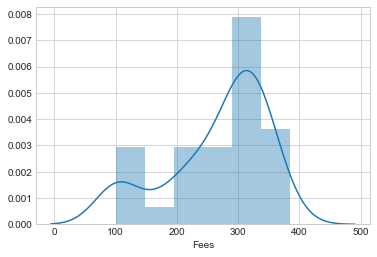

In [70]:
Experience_mean = df.groupby(['Experience']).mean().reset_index()

sns.distplot(Experience_mean['Fees'])

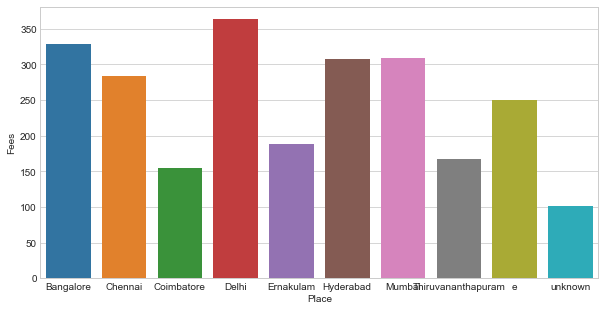

In [62]:
Place_mean = df.groupby(['Place']).mean().reset_index()

plt.figure(figsize = (10,5))
sns.barplot(x = Place_mean['Place'], y = Place_mean['Fees'])

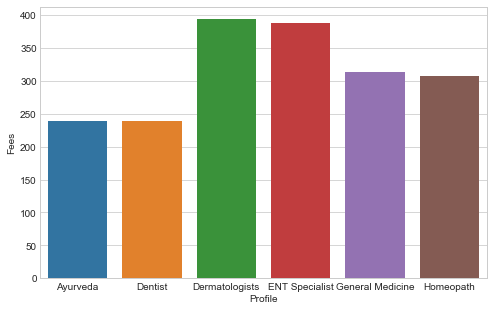

In [59]:
Profile_mean = df.groupby(['Profile']).mean().reset_index()

plt.figure(figsize = (8,5))
sns.barplot(x = Profile_mean['Profile'], y = Profile_mean['Fees'])

Getting data ready

In [71]:
df = df.drop(['Place','Profile','Qualification'],axis=1)

In [72]:
df_x = pd.DataFrame(df[df['source']== 'train'])

df_x = pd.DataFrame(df_x.drop('source',axis=1))

In [74]:
df_y = df[df['source']== 'test']

df_y = df_y.drop('source',axis=1)

In [76]:
X_train = df_x.drop('Fees',axis=1) 
Y_train = df_x['Fees']
X_test  = df_y.drop('Fees',axis=1)

SVR

Desicion tree Regressor

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

newdict = dict()
max_features_list = list(range(3,21,3))
max_depth_list = list(range(2,9))

for f in max_features_list:
     for d in  max_depth_list:
            model_dt = DecisionTreeRegressor(max_features=f , max_depth = d)
            kfold = KFold(n_splits = 10)
            results = cross_val_score(model_dt, X_train, Y_train, cv=kfold)
        
            newdict["max_features= {}, max_depth = {}".format(f,d)] = "model_score = {}%".format(results.mean()*100.0)
            

print(max(newdict,key = newdict.get),max(newdict.values()))

max_features= 12, max_depth = 3 model_score = 9.413236753330283%


Random forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

newdict2 = dict()
max_depth_list = list(range(3,9))
n_estimators_list = list(range(4,24,4))

for d in max_depth_list:
     for n in  n_estimators_list:
            model_rf = RandomForestRegressor(max_depth=d , n_estimators = n)
            kfold = KFold(n_splits = 10)
            results = cross_val_score(model_rf, X_train, Y_train, cv=kfold)
        
            newdict2["n_estimators= {}, max_depth = {}".format(n,d)] = "model_score = {}%".format(results.mean()*100.0)
            

print(max(newdict2,key = newdict2.get),max(newdict2.values()))

n_estimators= 20, max_depth = 7 model_score = 16.58768897271799%


Ridge Regression

In [90]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.3)
ridge = ridge.fit(X_train,Y_train)

kfold = KFold(n_splits = 10)
results = cross_val_score(model_rf, X_train, Y_train, cv=kfold)

print("model_score: %.3f%%" % (results.mean()*100.0))

model_score: 15.922%


Lasso Regression

In [91]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.3)
lasso = lasso.fit(X_train,Y_train)

kfold = KFold(n_splits = 10)
results = cross_val_score(lasso, X_train, Y_train, cv=kfold)

print("model_score: %.3f%%" % (results.mean()*100.0))

model_score: 15.523%


Please discuss this project with me when you review